<h1 style="color:red">Project 1 : Mercedes-Benz Greener Manufacturing</h1>

<h3 style='color:orange'>Problem Statement Scenario:</h3>

**Reduce the time a Mercedes-Benz spends on the test bench.**

**DESCRIPTION**

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

**Following actions should be performed:**

1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
2. Check for null and unique values for test and train sets.
3. Apply label encoder.
4. Perform dimensionality reduction.
5. Predict your test_df values using XGBoost.

<h1 style="color:purple">Import necessary liabraries - </h1> 

In [383]:
import pandas as pd
import numpy as np
from termcolor import colored
from colored import stylize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score,r2_score

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

<h1 style="color:purple">Load the dataset - </h1>

In [384]:
#load the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [414]:
#make a copy of data 
train_df =  train.copy()
test_df = test.copy()

In [415]:
train_df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [416]:
test_df

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [417]:
print(colored("Shape of train dataset :",'blue',attrs=['bold']),train_df.shape)
print(colored("Shape of test dataset :",'blue',attrs=['bold']),test_df.shape)

Shape of train dataset : (4209, 378)
Shape of test dataset : (4209, 377)


In [418]:
print(colored('Available features :\n','blue',attrs=['bold']),list(train_df.columns))
print(colored('No of available features :\n','blue',attrs=['bold']),len(list(train_df.columns)))

Available features :
 ['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138'

<h1 style="color:purple"> Drop columns with zero variance - </h1>

In [419]:
#sort out the categorical and numerical columns in both the datasets
#for training data
categorical_train = train_df.select_dtypes(include=np.object).columns
numerical_train = train_df.drop(categorical_train,axis=1).columns

#for test data
categorical_test = test_df.select_dtypes(include=np.object).columns
numerical_test = test_df.drop(categorical_test,axis=1).columns

print(colored("Categorical features in training data :\n",'blue',attrs=['bold']), list(categorical_train))
print(colored("\n Numerical features in training data :\n",'blue',attrs=['bold']),list(numerical_train))
print(colored("\n Categorical features in testing data :\n",'blue',attrs=['bold']),list(categorical_test))
print(colored("\n Numerical features in testing data :\n",'blue',attrs=['bold']),list(numerical_test))

Categorical features in training data :
 ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

 Numerical features in training data :
 ['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', '

In [420]:
#filter the features with zero variance
zero_var_train =[]
zero_var_test =[]

for col in numerical_train:
    if train_df[col].var()==0:
        zero_var_train.append(col)
        train_df.drop(col,axis=1,inplace=True)
print(colored("Features with zero variance in train set are :-\n",'yellow',attrs=['bold']),zero_var_train)
print(colored("New Size of train set :-\n",'green',attrs=['bold']), train_df.shape)

for col in numerical_test:
    if test_df[col].var()==0:
        zero_var_test.append(col)
        test_df=test_df.drop(col,axis=1)
print(colored("Features with zero variance in test set are :-\n",'yellow',attrs=['bold']),zero_var_test)
print(colored("New Size of test set :-\n",'green',attrs=['bold']), test_df.shape)


Features with zero variance in train set are :-
 ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
New Size of train set :-
 (4209, 366)
Features with zero variance in test set are :-
 ['X257', 'X258', 'X295', 'X296', 'X369']
New Size of test set :-
 (4209, 372)


<h1 style="color:purple">Check for null values - </h1>

In [421]:
null_col_train = []
null_col_test = []
for col in train_df.columns:
    if train_df[col].isnull().sum()!=0:
        null_col_train.append(col)
if len(null_col_train)==0:
    print(colored("There are no null values in train set ",'green',attrs=['bold']))
else:
    print(colored("There are null values in ",'red',attrs=['bold']),null_col_train)
    
    
for col in test_df.columns:
    if test_df[col].isnull().sum()!=0:
        null_col_test.append(col)
if len(null_col_test)==0:
    print(colored("There are no null values in test set",'green',attrs=['bold']))
else:
    print(colored("There are null values in ",'red',attrs=['bold']),null_col_test)

There are no null values in train set 
There are no null values in test set


<h2 style="color:orange">Data types of columns in the two datasets - </h2> 

**There are columns in test dataset which are not in training data after removing the features with zero varience.
These columns will increase the complexity unnecessarily without contributing anyting to the predictions.** 

**So we try to keep the common columns in both the datasets**

In [422]:
print(colored("Training features :-\n",'red',attrs=['bold']),list(train_df.columns))
print(colored("\nShape of training data :-",'green',attrs=['bold']),train_df.shape)
print(colored("\nTest features :-\n",'red',attrs=['bold']),list(test_df.columns))
print(colored("\nShape of test data :-",'green',attrs=['bold']),test_df.shape)

Training features :-
 ['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X14

In [423]:
#identify the uncommon features in both the datasets
com_features=[]
for col in test_df.columns:
    if col not in train_df.columns:
        com_features.append(col)
print(colored("Features that are not in train data but are present in test data are:\n",'red',attrs=['bold']),com_features)

com_features2=[]
for col in train_df.columns:
    if col not in test_df.columns:
        com_features2.append(col)
print(colored("Features that are in train data but are absent in test data are:\n",'red',attrs=['bold']),com_features2)

Features that are not in train data but are present in test data are:
 ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Features that are in train data but are absent in test data are:
 ['y', 'X257', 'X258', 'X295', 'X296', 'X369']


In [424]:
# we check the data types of above features 
print(colored("Data types of uncommon features that are not in train data but are present in test data are:-\n",'red',attrs=['bold']))
for col in com_features:
    print(col,colored('=>',attrs=['bold']),test_df[col].dtypes)
    
print(colored("Data types of uncommon features that are in train data but are absent in test data are:-\n",'red',attrs=['bold']))
for col in com_features2:
    print(col,colored('=>',attrs=['bold']),train_df[col].dtypes)

Data types of uncommon features that are not in train data but are present in test data are:-

X11 => int64
X93 => int64
X107 => int64
X233 => int64
X235 => int64
X268 => int64
X289 => int64
X290 => int64
X293 => int64
X297 => int64
X330 => int64
X347 => int64
Data types of uncommon features that are in train data but are absent in test data are:-

y => float64
X257 => int64
X258 => int64
X295 => int64
X296 => int64
X369 => int64


In [425]:
# check variance of above features
print(colored("Describe the variance in test data:-\n",'red',attrs=['bold']),test_df.var().describe())
print(colored('\nVariance of uncommon features present in test data:-\n','red',attrs=['bold']))
for col in com_features:
    print(col,colored('=>',attrs=['bold']),test_df[col].var())
    
print(colored("\nDescribe the variance in train data:-\n",'red',attrs=['bold']),train_df.var().describe())
print(colored('\nVariance of uncommon features present in train data:-\n','red',attrs=['bold']))
for col in com_features2:
    print(col,colored('=>',attrs=['bold']),train_df[col].var())

Describe the variance in test data:-
 count    3.640000e+02
mean     1.613004e+04
std      3.077403e+05
min      2.375861e-04
25%      3.551935e-03
50%      2.319965e-02
75%      9.414604e-02
max      5.871311e+06
dtype: float64

Variance of uncommon features present in test data:-

X11 => 0.00023758612497034687
X93 => 0.00047505932877853706
X107 => 0.0009496669729088438
X233 => 0.00023758612497030927
X235 => 0.00023758612497032096
X268 => 0.00023758612497034893
X289 => 0.0004750593287785392
X290 => 0.00023758612497031984
X293 => 0.00023758612497031984
X297 => 0.00023758612497032516
X330 => 0.00023758612497031984
X347 => 0.0004750593287785361

Describe the variance in train data:-
 count    3.580000e+02
mean     1.659810e+04
std      3.140411e+05
min      2.375861e-04
25%      5.024399e-03
50%      2.297302e-02
75%      9.287924e-02
max      5.941936e+06
dtype: float64

Variance of uncommon features present in train data:-

y => 160.7667096822783
X257 => 0.00023758612497030288
X258 => 

<h2 style='color:orange'>Conclusions-</h2>

**1.The variences of the uncommon columns present in test data are very small(most of them are less than 25th percentile range of total varience. So we can safely delete these columns from testing data.**
 
**2.In case of features present in train data,except target variable, the variances are less than 25th percentile. These features can be dropped from train set.**

In [426]:
for col in com_features:
    test_df.drop(col,axis=1,inplace=True)

In [427]:
# drop uncommon columns in train dataset except target column
com_features2 = com_features2[1:]
for col in com_features2:
    train_df.drop(col,axis=1,inplace=True)

In [428]:
print(colored("New shape of test data :-",'blue',attrs=['bold']),test_df.shape)
print(colored("Shape of train data :-",'blue',attrs=['bold']),train_df.shape)

New shape of test data :- (4209, 360)
Shape of train data :- (4209, 361)


In [276]:
train_df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [277]:
test_df

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


<h1 style="color:purple">Encode the object dtype columns - </h1>  

In [429]:
#for training data
categorical_train = train_df.select_dtypes(include=np.object).columns
numerical_train = train_df.drop(categorical_train,axis=1).columns

#for test data
categorical_test = test_df.select_dtypes(include=np.object).columns
numerical_test = test_df.drop(categorical_test,axis=1).columns

In [430]:
le=LabelEncoder()
for i in categorical_train:
    train_df[i] = le.fit_transform(train_df[i])
    
for i in categorical_test:
    test_df[i] = le.fit_transform(test_df[i])

<h1 style="color:purple">Dimensionality reduction - </h1> 

**There are so many techniques used to reduce the dimensionality. Most common is PCA. But we have most of the categorical columns in our dataset. It may give good results but PCA requires standardiation of data and standardizating the categorical data we will lose the identity of the cateory, which is not a good practice.**

<h3 style='color:orange'>To avoid this we will use Model-Based Feature Selection method.</h3>

In [431]:
x = train_df.drop(['ID','y'],axis=1)
y = train_df['y']

pred_index = test_df.ID
x_test = test_df.drop('ID',axis=1)

seed=2021

<h1 style="color:purple">Split the train_df dataset into train and valid datasets to train the model on train data and check the performance on the valid dataset - </h1> 

In [432]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.2,random_state=seed)

In [433]:
print(colored("Shape of original train data :",'red',attrs=['bold']),train_df.shape)
print(colored("Shape of given test data :",'red',attrs=['bold']),test_df.shape)

print(colored("\nShape of x_train :",'blue',attrs=['bold']),x_train.shape)
print(colored("Shape of y_train :",'blue',attrs=['bold']),y_train.shape)
print(colored("Shape of x_valid :",'blue',attrs=['bold']),x_valid.shape)
print(colored("Shape of y_valid :",'blue',attrs=['bold']),y_valid.shape)

Shape of original train data : (4209, 361)
Shape of given test data : (4209, 360)

Shape of x_train : (3367, 359)
Shape of y_train : (3367,)
Shape of x_valid : (842, 359)
Shape of y_valid : (842,)


In [450]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(xgb.XGBRegressor(n_estimators = 10000,random_state=seed))

select.fit(x_train,y_train)
x_train_l1 = select.transform(x_train)
x_valid_l1 = select.transform(x_valid)
x_test_l1 = select.transform(x_test)

print(colored("x_train.shape: {}",'blue',attrs=['bold']).format(x_train.shape))
print(colored("x_train_l1.shape: {}",'blue',attrs=['bold']).format(x_train_l1.shape))


print(colored("\nx_valid.shape: {}",'blue',attrs=['bold']).format(x_valid.shape))
print(colored("x_valid_l1.shape: {}",'blue',attrs=['bold']).format(x_valid_l1.shape))


print(colored("\nx_test.shape: {}",'blue',attrs=['bold']).format(test_df.shape))
print(colored("x_test_l1.shape: {}",'blue',attrs=['bold']).format(x_test_l1.shape))

x_train.shape: (3367, 359)
x_train_l1.shape: (3367, 14)

x_valid.shape: (842, 359)
x_valid_l1.shape: (842, 14)

x_test.shape: (4209, 360)
x_test_l1.shape: (4209, 14)


<h3 style="color:orange">Out of 360 features the model_based_feature selective model selected 14 features </h3> 

359


Text(0.5, 0, 'Sample Index')

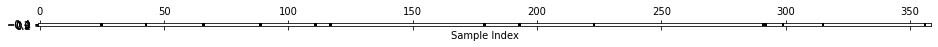

In [493]:
#Visualize the features selected 
mask = select.get_support()
print(len(mask))
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel("Sample Index")

<h1 style="color:purple">Build the predictive model for the time spend on the test bench - </h1>   


<h2 style='color:orange'>Using XGBRegressor </h2>

In [452]:
reg = xgb.XGBRFRegressor(n_estimators = 500,random_state=seed)
reg.fit(x_train_l1,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=0.8, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=1, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=500, n_jobs=4, num_parallel_tree=500,
               objective='reg:squarederror', random_state=2021, reg_alpha=0,
               reg_lambda=1e-05, scale_pos_weight=1, subsample=0.8,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [453]:
# Predict the train and validation sets
ypred_train = reg.predict(x_train_l1)
ypred_valid = reg.predict(x_valid_l1)

In [456]:
# Check the accuracy of the model
print(colored('R Squared for train data :','blue',attrs=['bold']),r2_score(y_train,ypred_train))

rmse = np.sqrt(MSE(y_train,ypred_train))
print(colored("RMSE for train data : ",'blue',attrs=['bold']) ,(rmse))



print(colored('\nR Squared for valid data :','green',attrs=['bold']),r2_score(y_valid,ypred))

rmse = np.sqrt(MSE(y_valid, ypred))
print(colored("RMSE for valid data : ",'green',attrs=['bold']),(rmse))

R Squared for train data : 0.5807402023118569
RMSE for train data :  8.20622970493352

R Squared for valid data : 0.5871141396094182
RMSE for valid data :  8.156796476398538


<h1 style="color:purple">Cross validation -</h1> 

In [458]:
cvresult = cross_validate(reg,x_train_l1,y_train, cv=20,scoring='r2')

In [459]:
cvresult

{'fit_time': array([1.10304904, 1.03523302, 1.03722811, 1.06116295, 1.07914734,
        1.0491941 , 1.05119181, 1.07014108, 1.11701512, 1.1080389 ,
        1.05717325, 1.35490847, 1.30805707, 1.10073543, 1.09083271,
        1.12591362, 1.12898278, 1.12299871, 1.05022407, 1.05119061]),
 'score_time': array([0.00398874, 0.00498652, 0.00299168, 0.0039885 , 0.00395823,
        0.00399089, 0.00398803, 0.00398874, 0.00398803, 0.00498629,
        0.00398993, 0.        , 0.        , 0.        , 0.00494194,
        0.00398874, 0.0039897 , 0.00398946, 0.00395632, 0.0039885 ]),
 'test_score': array([0.53551009, 0.63776038, 0.58948258, 0.54364459, 0.49226872,
        0.64364877, 0.64702263, 0.57234615, 0.64883251, 0.60265058,
        0.64364657, 0.53760938, 0.17874613, 0.63747266, 0.61140286,
        0.59800608, 0.63857673, 0.61397199, 0.63396528, 0.71696197])}

In [460]:
print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cvresult['test_score']),
                                                                          np.std(cvresult['test_score']),
                                                                          np.min(cvresult['test_score']),
                                                                          np.max(cvresult['test_score'])))

CV Score : Mean - 0.5861763 | Std - 0.1061216 | Min - 0.1787461 | Max - 0.716962


In [467]:
# Again Predict training set:
train_predictions = reg.predict(x_train_l1)
valid_predictions = reg.predict(x_valid_l1)

In [477]:
#Print model report for train and valid data:
print (colored("\nModel Report for train dataset",'blue',attrs=['bold']))
print ("Accuracy : %.4g" % metrics.r2_score(y_train.values, train_predictions))
print ("RMSE (Train): %f" % np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))    

print (colored("\nModel Report for valid dataset",'blue',attrs=['bold']))
print ("Accuracy : %.4g" % metrics.r2_score(y_valid.values, valid_predictions))
print ("RMSE (Valid): %f" % np.sqrt(metrics.mean_squared_error(y_valid, valid_predictions)))   


Model Report for train dataset
Accuracy : 0.5807
RMSE (Train): 8.206230

Model Report for valid dataset
Accuracy : 0.5892
RMSE (Valid): 8.136366


Text(0, 0.5, 'Feature Importance Score')

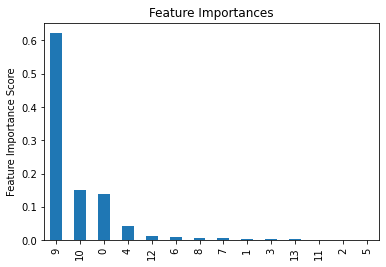

In [472]:
feat_imp = pd.Series(reg.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

<h1 style="color:purple">Hyperparameter tuning -</h1> 

<h3 style="color:orange">Parameters to tune -</h3>

1. n_estimators
2. max_depth
3. reg_lambda
4. reg_alpha
5. subsample
6. gamma

<h2 style="color:orange">1. Grid search on n_estimators -</h2>

In [473]:
param_test1 = {
    'n_estimators':range(100,1000,100)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRFRegressor(seed=seed), 
                       param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=20)
gsearch1.fit(x_train_l1,y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=0.8,
                                      colsample_bytree=None, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=1, max_delta_step=None,
                                      max_depth=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimat...
                                      num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=None, reg_alpha=None,
                                      reg_lambda=1e-05, scale_pos_weigh

In [474]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 900}, 0.5862763171444425)

<h2 style="color:orange">2. Grid search on max_depth -</h2>

In [319]:
param_test2 = {
    'max_depth':range(2,10,1),
    }
gsearch2 = GridSearchCV(estimator = xgb.XGBRFRegressor( n_estimators=900,seed=seed), 
                       param_grid = param_test2, scoring='r2',n_jobs=4, cv=20)
gsearch2.fit(x_train_l1,y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=0.8,
                                      colsample_bytree=None, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=1, max_delta_step=None,
                                      max_depth=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimat...
                                      num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=None, reg_alpha=None,
                                      reg_lambda=1e-05, scale_pos_weigh

In [320]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 5}, 0.5879500934421615)

<h2 style="color:orange">3. Grid search for reg_lambda -</h2>

In [335]:
param_test3 = {
    'reg_lambda':[3.9e-6,4.0e-6,4.1e-6,4.2e-6,4.3e-6]
    }
gsearch3 = GridSearchCV(estimator = xgb.XGBRFRegressor(n_estimators=900,max_depth=5,seed=seed), 
                       param_grid = param_test3, scoring='r2',n_jobs=4, cv=20)
gsearch3.fit(x_train_l1,y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=0.8,
                                      colsample_bytree=None, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=1, max_delta_step=None,
                                      max_depth=5, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators...
                                      objective='reg:squarederror',
                                      random_state=None, reg_alpha=None,
                                      reg_lambda=1e-05, scale_pos_weight=None,
                                      seed=2021, subsa

In [336]:
gsearch3.best_params_, gsearch3.best_score_

({'reg_lambda': 4.1e-06}, 0.5879531760348303)

<h2 style="color:orange">4. Grid search for reg_alpha -</h2>

In [358]:
param_test5 = {
    'reg_alpha':[1.3e-6, 1.4e-6,1.29e-6]
    }
gsearch5 = GridSearchCV(estimator = xgb.XGBRFRegressor(n_estimators=900,max_depth=5,seed=seed,reg_lambda=4.1e-06), 
                       param_grid = param_test5, scoring='r2',n_jobs=4, cv=20)
gsearch5.fit(x_train_l1,y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=0.8,
                                      colsample_bytree=None, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=1, max_delta_step=None,
                                      max_depth=5, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators...
                                      num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=None, reg_alpha=None,
                                      reg_lambda=4.1e-06, scale_pos_wei

In [359]:
gsearch5.best_params_, gsearch5.best_score_

({'reg_alpha': 1.3e-06}, 0.5879531773566102)

<h2 style="color:orange">5. Grid search for subsample -</h2>

In [362]:
param_test6 = {
    'subsample':[i/100.0 for i in range(82,86,1)]
    }
gsearch6 = GridSearchCV(estimator = xgb.XGBRFRegressor(n_estimators=900,max_depth=5,seed=seed,
                                                       reg_lambda=4.1e-06,reg_alpha=1.3e-06), 
                       param_grid = param_test6, scoring='r2',n_jobs=4, cv=20)
gsearch6.fit(x_train_l1,y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=0.8,
                                      colsample_bytree=None, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=1, max_delta_step=None,
                                      max_depth=5, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators...
                                      num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=None, reg_alpha=1.3e-06,
                                      reg_lambda=4.1e-06, scale_pos_

In [363]:
gsearch6.best_params_, gsearch6.best_score_

({'subsample': 0.85}, 0.5882756473642055)

In [366]:
param_test6b = {
    'subsample':[0.86,0.87,0.88,0.89]
    }
gsearch6b = GridSearchCV(estimator = xgb.XGBRFRegressor(n_estimators=900,max_depth=5,seed=seed,
                                                        reg_lambda=4.1e-06,reg_alpha=1.3e-6), 
                       param_grid = param_test6b, scoring='r2',n_jobs=4, cv=20)
gsearch6b.fit(x_train_l1,y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=0.8,
                                      colsample_bytree=None, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=1, max_delta_step=None,
                                      max_depth=5, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators...
                                      num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=None, reg_alpha=1.3e-06,
                                      reg_lambda=4.1e-06, scale_pos_

In [367]:
gsearch6b.best_params_, gsearch6b.best_score_

({'subsample': 0.88}, 0.5884875898114211)

<h2 style="color:orange">6. Grid search for gamma -</h2>

In [374]:
param_test7 = {
    'gamma':[0.179,0.18,0.181,0.182]
    }
gsearch7 = GridSearchCV(estimator = xgb.XGBRFRegressor(n_estimators=900,max_depth=5,seed=seed,
                                                       reg_lambda=4.1e-06,reg_alpha=1.3e-6,subsample=0.88), 
                       param_grid = param_test7, scoring='r2',n_jobs=4, cv=20)
gsearch7.fit(x_train_l1,y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=0.8,
                                      colsample_bytree=None, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=1, max_delta_step=None,
                                      max_depth=5, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators...
                                      num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=None, reg_alpha=1.3e-06,
                                      reg_lambda=4.1e-06, scale_pos_

In [375]:
gsearch7.best_params_, gsearch7.best_score_

({'gamma': 0.18}, 0.5884876621900148)

<h3 style='color:orange'>With grid search we got parameter values as-</h3>

1. n_estimators = 900
2. max_depth = 5
3. reg_lambda = 4.1e-06
4. reg_alpha = 1.3e-06
5. subsample = 0.88
6. gamma = 0.18

<h1 style='color:purple'>Again build the model with these parameters-</h1>

In [475]:
reg = xgb.XGBRFRegressor(n_estimators = 900,max_depth = 5,reg_lambda = 4.1e-06,reg_alpha = 1.3e-06,subsample = 0.88,
                         gamma = 0.18,random_state=seed)
reg.fit(x_train_l1,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=0.8, colsample_bytree=1, gamma=0.18, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=1, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=900, n_jobs=4, num_parallel_tree=900,
               objective='reg:squarederror', random_state=2021,
               reg_alpha=1.3e-06, reg_lambda=4.1e-06, scale_pos_weight=1,
               subsample=0.88, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [476]:
# Predict train and validation set
ypred_train = reg.predict(x_train_l1)
ypred_valid = reg.predict(x_valid_l1)

In [479]:
#Print model report for train and valid data:
print (colored("\nModel Report for train dataset",'blue',attrs=['bold']))
print ("Accuracy : %.4g" % metrics.r2_score(y_train.values, ypred_train))
print ("RMSE (Train): %f" % np.sqrt(metrics.mean_squared_error(y_train, ypred_train)))    

print (colored("\nModel Report for valid dataset",'blue',attrs=['bold']))
print ("Accuracy : %.4g" % metrics.r2_score(y_valid.values, ypred_valid))
print ("RMSE (Valid): %f" % np.sqrt(metrics.mean_squared_error(y_valid, ypred_valid)))   



Model Report for train dataset
Accuracy : 0.579
RMSE (Train): 8.223356

Model Report for valid dataset
Accuracy : 0.5884
RMSE (Valid): 8.144080


<h1 style='color:purple'>Predict the test dataset and save the results-</h1>

In [482]:
ypred_test=reg.predict(x_test_l1)

In [486]:
output = pd.DataFrame()
output['ID'] = pred_index
output['time_spend_on_test_bench'] = ypred_test
output.to_csv("output_xgbreg.csv")

In [487]:
output

,ID,time_spend_on_test_bench
0,1,78.182289
1,2,118.747749
2,3,78.182289
3,4,78.182289
4,5,112.291656
...,...,...
4204,8410,103.534996
4205,8411,94.132843
4206,8413,94.093765
4207,8414,112.291656


<h1 style='color:purple'>Conclusion-</h1>

* In conclusion,We have predicted the time spend by Mercedes-Benz on the test bench using xgboost.
* We incorporated various techniques like label encoding,dimensionality reduction, xgbrfregressor to hit the predictions.
* The feature names are not specified clearly, which would have helped in deriving more insights from the dataset and in creating new interactive features from the dataset as well.
* To reduce the time the company should focus on the features specified in the feature importance graph.

<img src="thank-you-944086_1920.jpg">